<a href="https://colab.research.google.com/github/vinaykumar2491/Project_MachineLearning/blob/master/imflash217_fastai_4_tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tabular Models:
```
Tabular data should be in Pandas DataFrame
```

In [0]:
from fastai.tabular import *

In [3]:
path = untar_data(url=URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv'),
 PosixPath('/root/.fastai/data/adult_sample/export.pkl')]

In [0]:
df = pd.read_csv(path/"adult.csv")

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [7]:
df.shape

(32561, 15)

In [0]:
target_var          = "salary"
category_names      = ["workclass", "education", "marital-status", "occupation", "relationship", "race"]
continuous_names    = ["age", "fnlwgt", "education-num"]

### various processing callbacks 
procs = [FillMissing, Categorify, Normalize]

In [0]:
test_data = TabularList.from_df(df=df.iloc[800:1000].copy(), path=path, cat_names=category_names, cont_names=continuous_names)


In [0]:
data = (TabularList.from_df(df=df, cat_names=category_names, cont_names=continuous_names, procs=procs)
                   .split_by_idx(list(range(800, 1000)))
                   .label_from_df(cols=target_var)
                   .add_test(test_data)
                   .databunch())

In [11]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,9th,Married-civ-spouse,Craft-repair,Husband,White,False,0.0303,-0.1458,-1.9869,<50k
Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,False,0.4701,0.4895,-0.4224,>=50k
Private,9th,Divorced,Prof-specialty,Not-in-family,Black,False,-0.7760,-0.1355,-1.9869,<50k
Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,False,-1.2158,-0.1486,-0.4224,<50k
Private,9th,Divorced,Adm-clerical,Not-in-family,White,False,-0.5561,-0.6747,-1.9869,<50k


In [12]:
data.c

2

In [13]:
data.classes

['<50k', '>=50k']

In [14]:
data

TabularDataBunch;

Train: LabelList (32361 items)
x: TabularList
workclass  Private; education  Assoc-acdm; marital-status  Married-civ-spouse; occupation #na#; relationship  Wife; race  White; education-num_na False; age 0.7632; fnlwgt -0.8381; education-num 0.7511; ,workclass  Private; education  Masters; marital-status  Divorced; occupation  Exec-managerial; relationship  Not-in-family; race  White; education-num_na False; age 0.3968; fnlwgt 0.4458; education-num 1.5334; ,workclass  Private; education  HS-grad; marital-status  Divorced; occupation #na#; relationship  Unmarried; race  Black; education-num_na True; age -0.0430; fnlwgt -0.8868; education-num -0.0312; ,workclass  Self-emp-inc; education  Prof-school; marital-status  Married-civ-spouse; occupation  Prof-specialty; relationship  Husband; race  Asian-Pac-Islander; education-num_na False; age -0.0430; fnlwgt -0.7288; education-num 1.9245; ,workclass  Self-emp-not-inc; education  7th-8th; marital-status  Married-civ-spouse; 

In [15]:
data.x

TabularList (32361 items)
workclass  Private; education  Assoc-acdm; marital-status  Married-civ-spouse; occupation #na#; relationship  Wife; race  White; education-num_na False; age 0.7632; fnlwgt -0.8381; education-num 0.7511; ,workclass  Private; education  Masters; marital-status  Divorced; occupation  Exec-managerial; relationship  Not-in-family; race  White; education-num_na False; age 0.3968; fnlwgt 0.4458; education-num 1.5334; ,workclass  Private; education  HS-grad; marital-status  Divorced; occupation #na#; relationship  Unmarried; race  Black; education-num_na True; age -0.0430; fnlwgt -0.8868; education-num -0.0312; ,workclass  Self-emp-inc; education  Prof-school; marital-status  Married-civ-spouse; occupation  Prof-specialty; relationship  Husband; race  Asian-Pac-Islander; education-num_na False; age -0.0430; fnlwgt -0.7288; education-num 1.9245; ,workclass  Self-emp-not-inc; education  7th-8th; marital-status  Married-civ-spouse; occupation  Other-service; relationship

In [16]:
data.y

CategoryList (32361 items)
>=50k,>=50k,<50k,>=50k,<50k
Path: .

### Creating the learner

In [18]:
learner = tabular_learner(data=data, layers=[200, 100], metrics=accuracy)
learner.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


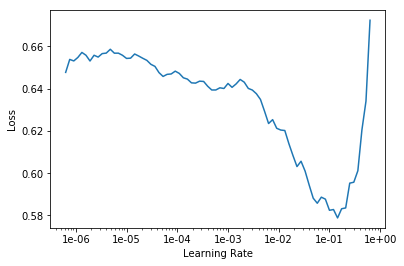

In [20]:
learner.lr_find()
learner.recorder.plot()

In [0]:
lr = 1e-2

In [23]:
learner.fit_one_cycle(cyc_len=5, max_lr=lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.360037,0.385118,0.845000,00:06
1,0.363952,0.367156,0.835000,00:06
2,0.348024,0.355581,0.850000,00:06
3,0.347489,0.349810,0.850000,00:06
4,0.350019,0.351407,0.855000,00:06


In [28]:
learner.fit_one_cycle(cyc_len=5, max_lr=slice(2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.360127,0.350884,0.845000,00:06
1,0.362958,0.368286,0.850000,00:06
2,0.363230,0.393426,0.850000,00:06
3,0.340372,0.494111,0.835000,00:06
4,0.335853,0.336996,0.845000,00:06


In [0]:
learner.unfreeze()

### Inference

In [29]:
row = df.iloc[0]
row

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                      12
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [30]:
row[target_var]

'>=50k'

In [31]:
learner.predict(item=row)

(Category >=50k, tensor(1), tensor([0.4974, 0.5026]))